# UAS

# Efisiensi Energi

## Data Understanding

### Sumber Data Set

Data Set diambil dari:

https://archive.ics.uci.edu/dataset/242/energy+efficiency

Tsanas, A. & Xifara, A. (2012). Energy Efficiency [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

### Penjelasan Fitur dan Variabel

Dataset ini digunakan untuk memprediksi efisiensi energi bangunan, yang diukur melalui dua indikator utama: Heating Load (Y1) dan Cooling Load (Y2). Setiap baris pada dataset mewakili satu desain bangunan dengan sejumlah parameter fisik yang berpengaruh terhadap konsumsi energi.

Fitur-fitur yang dianalisis dalam dataset ini meliputi:

* Relative Compactness: ukuran seberapa ringkas bentuk bangunan,
* Surface Area dan Wall Area: luas permukaan luar dan dinding bangunan,
* Roof Area: total area atap,
* Overall Height: tinggi total bangunan,
* Orientation: orientasi bangunan terhadap arah mata angin,
* Glazing Area: persentase permukaan bangunan yang terdiri dari kaca,
* Glazing Area Distribution: distribusi letak kaca pada sisi bangunan.

Semua fitur ini bersifat numerik dan dirancang untuk mengukur pengaruh bentuk, ukuran, dan pencahayaan alami terhadap kebutuhan energi bangunan.

Adapun variabel target dalam dataset ini adalah:

* Y1 (Heating Load): jumlah energi yang dibutuhkan untuk pemanasan ruang,
* Y2 (Cooling Load): jumlah energi yang dibutuhkan untuk pendinginan ruang.

Kedua target ini diukur secara kontinu, dan bertujuan membantu dalam perancangan bangunan yang hemat energi.

### Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut: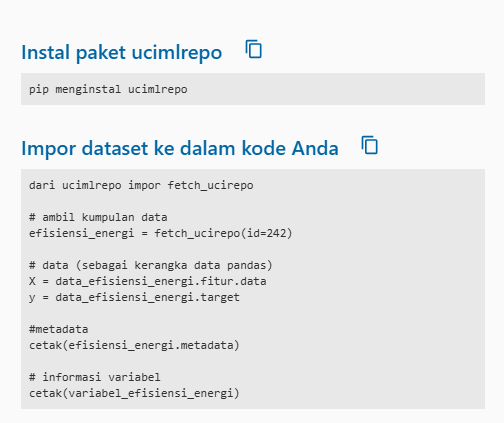

In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

 ## data (as pandas dataframes)
data = energy_efficiency.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("energy_efficiency.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


### Visulaisasi Data

In [3]:
display(data) #display dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Matplotlib is building the font cache; this may take a moment.


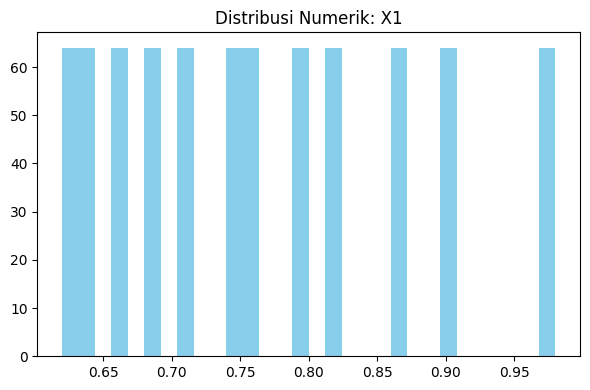

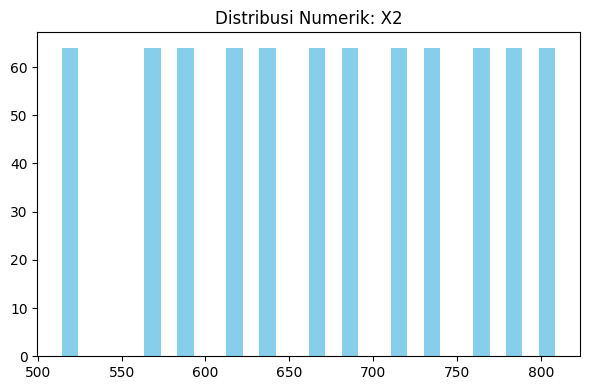

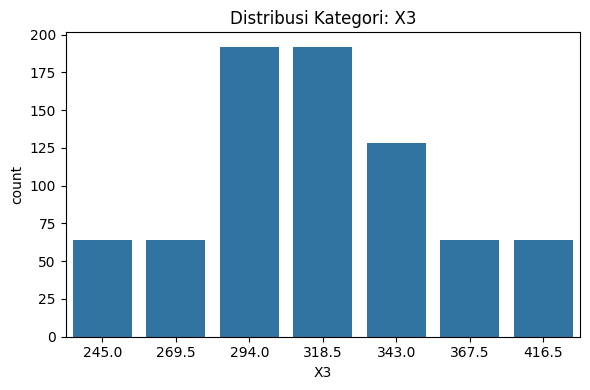

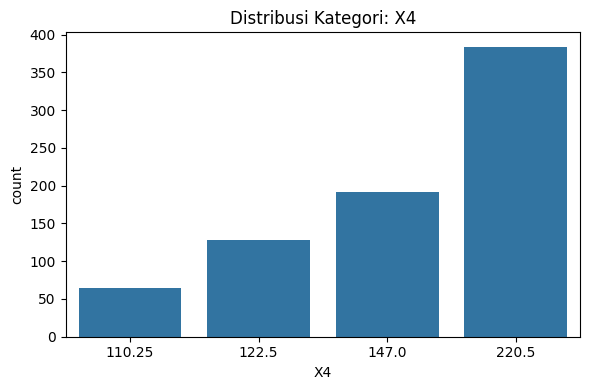

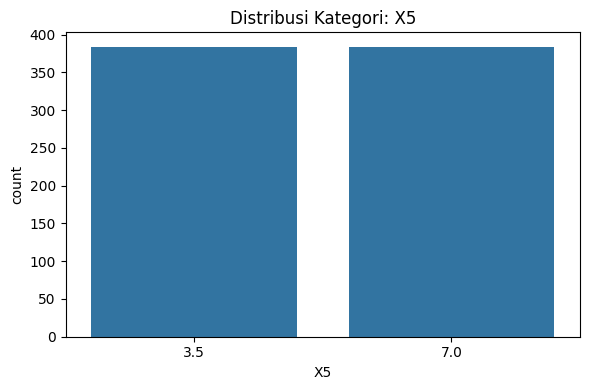

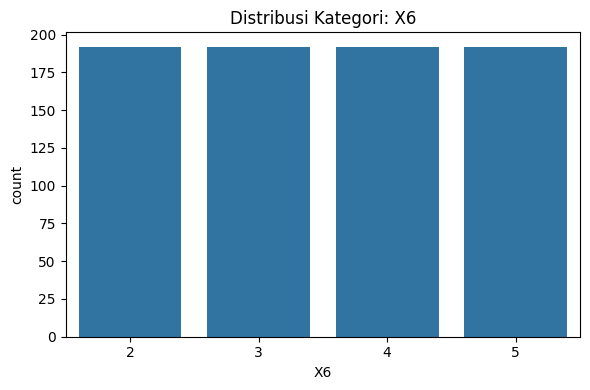

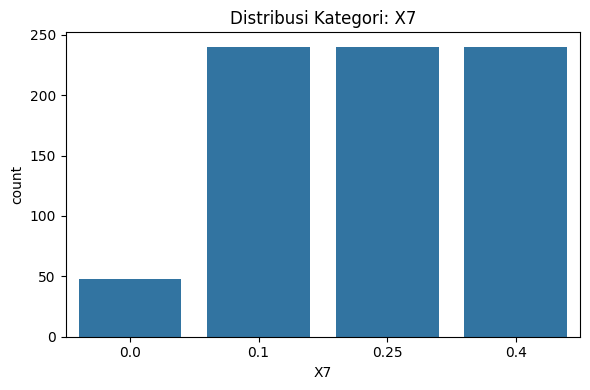

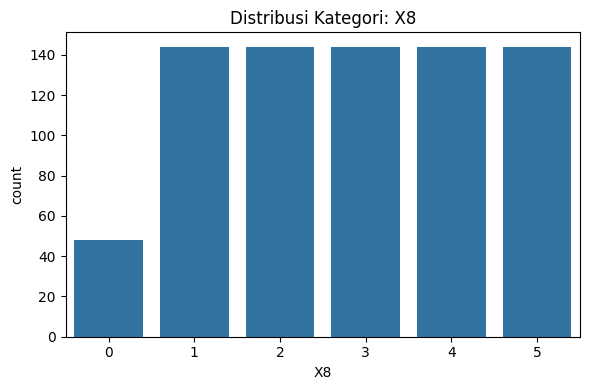

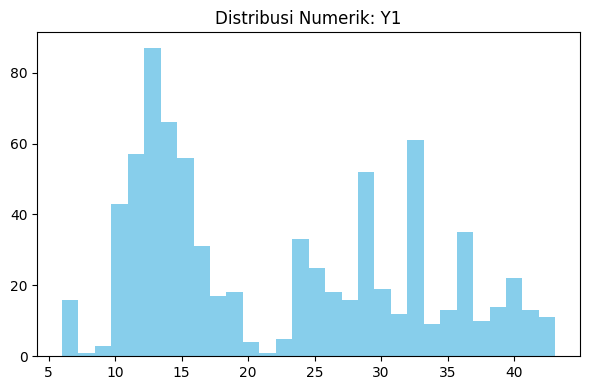

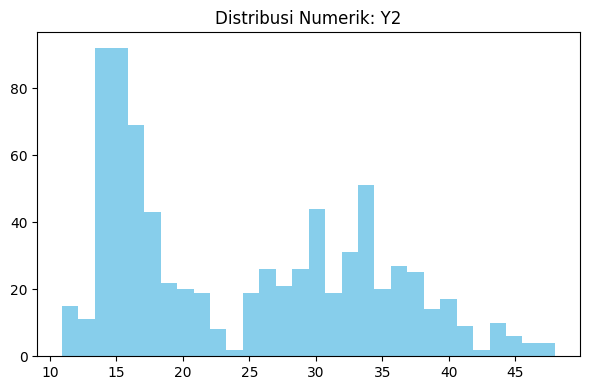

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop semua kolom
for column in data.columns:
    plt.figure(figsize=(6, 4))
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        sns.countplot(x=column, data=data)
        plt.title(f'Distribusi Kategori: {column}')
    else:
        plt.hist(data[column].dropna(), bins=30, color='skyblue')
        plt.title(f'Distribusi Numerik: {column}')
    plt.tight_layout()
    plt.show()

### Missing Value

In [5]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []
Missing Value Counts:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


## Preprocessing Data

### Normalisasi Data

Kode tersebut bertujuan untuk melakukan praproses awal terhadap dataset efisiensi energi bangunan dari UCI. Langkah yang dilakukan meliputi pengambilan data, pengecekan dan penanganan nilai kosong (meskipun data ini umumnya bersih), pemisahan antara fitur (X1–X8) dan target (Y1 dan Y2), serta normalisasi fitur menggunakan MinMaxScaler agar seluruh nilai berada dalam rentang 0 hingga 1. Normalisasi ini penting agar fitur memiliki skala yang seimbang sebelum digunakan dalam pemodelan machine learning. Hasil akhirnya berupa data yang telah siap digunakan untuk proses pelatihan dan evaluasi model.

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

# Ambil dataset dari UCI
energy_efficiency = fetch_ucirepo(id=242)
data = energy_efficiency.data.original

# Tangani missing value jika ada (meskipun dataset ini bersih)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

# Pisahkan fitur dan target
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = data[['Y1', 'Y2']]

# Normalisasi fitur dengan MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# Ubah ke DataFrame kembali
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

# Tampilkan hasil normalisasi
print("Hasil normalisasi dengan MinMaxScaler:")
print(X_minmax_df.head())


Hasil normalisasi dengan MinMaxScaler:
         X1        X2        X3        X4   X5        X6   X7   X8
0  1.000000  0.000000  0.285714  0.000000  1.0  0.000000  0.0  0.0
1  1.000000  0.000000  0.285714  0.000000  1.0  0.333333  0.0  0.0
2  1.000000  0.000000  0.285714  0.000000  1.0  0.666667  0.0  0.0
3  1.000000  0.000000  0.285714  0.000000  1.0  1.000000  0.0  0.0
4  0.777778  0.166667  0.428571  0.111111  1.0  0.000000  0.0  0.0


### Split Data

In [7]:
from sklearn.model_selection import train_test_split

# Split data (gunakan hasil dari normalisasi di atas)
X_train, X_test, y_train, y_test = train_test_split(
    X_minmax_df, y, test_size=0.2, random_state=42
)

# Tampilkan bentuk data
print("Bentuk data setelah split:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Bentuk data setelah split:
X_train: (614, 8)
X_test : (154, 8)
y_train: (614, 2)
y_test : (154, 2)


### Reduksi Dimensi dengan PCA

In [8]:
from sklearn.decomposition import PCA

# Inisialisasi PCA untuk reduksi ke 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_minmax_df)

# Ubah ke DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Tampilkan hasil reduksi dimensi
print("Hasil reduksi dimensi dengan PCA (2 komponen utama):")
print(X_pca_df.head())

# Variansi yang dijelaskan oleh masing-masing komponen
print("Variansi dijelaskan oleh PCA:", pca.explained_variance_ratio_)


Hasil reduksi dimensi dengan PCA (2 komponen utama):
        PC1       PC2
0  1.062000 -0.500000
1  1.062000 -0.166667
2  1.062000  0.166667
3  1.062000  0.500000
4  0.868368 -0.500000
Variansi dijelaskan oleh PCA: [0.55368141 0.13835355]


### Hasil Pre Processing

In [9]:
# Gabungkan kembali fitur hasil normalisasi (X_minmax_df) dengan target (y)
df_processed = pd.concat([X_minmax_df, y.reset_index(drop=True)], axis=1)

# Tampilkan jumlah total baris
print("Total baris dataset setelah preprocessing:", len(df_processed))

# Tampilkan seluruh data
print("\nData setelah preprocessing lengkap (fitur X1–X8 + Y1 dan Y2):\n")
print(df_processed.to_string(index=False))


Total baris dataset setelah preprocessing: 768

Data setelah preprocessing lengkap (fitur X1–X8 + Y1 dan Y2):

      X1       X2       X3       X4  X5       X6    X7  X8    Y1    Y2
1.000000 0.000000 0.285714 0.000000 1.0 0.000000 0.000 0.0 15.55 21.33
1.000000 0.000000 0.285714 0.000000 1.0 0.333333 0.000 0.0 15.55 21.33
1.000000 0.000000 0.285714 0.000000 1.0 0.666667 0.000 0.0 15.55 21.33
1.000000 0.000000 0.285714 0.000000 1.0 1.000000 0.000 0.0 15.55 21.33
0.777778 0.166667 0.428571 0.111111 1.0 0.000000 0.000 0.0 20.84 28.28
0.777778 0.166667 0.428571 0.111111 1.0 0.333333 0.000 0.0 21.46 25.38
0.777778 0.166667 0.428571 0.111111 1.0 0.666667 0.000 0.0 20.71 25.16
0.777778 0.166667 0.428571 0.111111 1.0 1.000000 0.000 0.0 19.68 29.60
0.666667 0.250000 0.285714 0.333333 1.0 0.000000 0.000 0.0 19.50 27.30
0.666667 0.250000 0.285714 0.333333 1.0 0.333333 0.000 0.0 19.95 21.97
0.666667 0.250000 0.285714 0.333333 1.0 0.666667 0.000 0.0 19.34 23.49
0.666667 0.250000 0.285714 0.333333 1

## Modelling

Modeling adalah proses membangun sebuah model matematis atau algoritmik berdasarkan data yang tersedia, dengan tujuan untuk memahami pola atau hubungan antar variabel dalam data, serta untuk membuat prediksi atau keputusan otomatis pada data baru.

Dalam konteks machine learning, modeling merupakan inti dari keseluruhan proses pembelajaran mesin, yaitu membuat model prediktif atau deskriptif dari data latih (training data), dan kemudian mengujinya pada data uji (testing data) untuk menilai kinerjanya.

## Pemodelan Prediksi Efisiensi Energi Bangunan Menggunakan Decision Tree

Pemodelan dalam penelitian ini bertujuan untuk mengklasifikasikan tingkat kebutuhan energi bangunan, baik dalam bentuk beban pemanasan (Heating Load / Y1) maupun beban pendinginan (Cooling Load / Y2). Proses klasifikasi dilakukan berdasarkan sejumlah fitur arsitektural dan fisik bangunan, seperti luas permukaan, tinggi bangunan, area dinding, area kaca, hingga orientasi bangunan.

Variabel target yang digunakan adalah Y1 dan Y2, yang telah diklasifikasikan ke dalam tiga kelas, yaitu Rendah, Sedang, dan Tinggi, berdasarkan rentang nilai aslinya menggunakan metode *binning*.


1. Pembagian Dataset: Data Latih dan Data Uji

Tahap awal dalam proses pemodelan melibatkan pembagian data menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk melatih model agar memahami pola hubungan antara fitur desain bangunan dengan kebutuhan energi.
* Data Uji (Testing Set): digunakan untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya.

Dataset dibagi dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian, mengikuti praktik umum dalam eksperimen machine learning.


2. Pra-pemrosesan Data

Sebelum dilakukan pelatihan model, beberapa langkah pra-pemrosesan dilakukan untuk mempersiapkan data:

* Normalisasi fitur numerik: Semua fitur input (seperti `Relative Compactness`, `Surface Area`, `Wall Area`, dll.) dinormalisasi menggunakan MinMaxScaler untuk memastikan skala data seragam antara 0 hingga 1.
* Transformasi target ke bentuk klasifikasi: Nilai kontinu `Y1` dan `Y2` dikonversi menjadi kelas kategori (Rendah, Sedang, Tinggi) agar sesuai untuk pemodelan klasifikasi.
* Pemisahan fitur dan target: Fitur-fitur prediktor (`X1` hingga `X8`) dipisahkan dari variabel target (`Y1_class`, `Y2_class`).


3. Pelatihan Model Decision Tree

Pemodelan dilakukan menggunakan algoritma Decision Tree Classifier, yaitu model pembelajaran terawasi yang meniru pola pengambilan keputusan secara bertingkat. Dalam proses ini:

* Setiap cabang pohon akan membagi data berdasarkan fitur yang paling mengurangi ketidakmurnian data (biasanya diukur menggunakan Gini Index).
* Model dibatasi kedalamannya (`max_depth = 5`) untuk menghindari overfitting dan menjaga generalisasi model.

4. Evaluasi Model

Setelah model dilatih, performanya dievaluasi menggunakan berbagai metrik:

* Akurasi: mengukur sejauh mana prediksi model sesuai dengan kelas sebenarnya.
* Classification Report: memberikan gambaran precision, recall, dan F1-score untuk masing-masing kelas (Rendah/Sedang/Tinggi).
* Confusion Matrix: menggambarkan distribusi hasil prediksi terhadap label aktual.
* Visualisasi Pohon Keputusan: digunakan untuk memahami fitur mana yang paling memengaruhi klasifikasi serta logika pembentukan keputusan model.


5. Prediksi Kebutuhan Energi Bangunan Baru

Model yang telah dilatih dapat digunakan untuk:

* Memprediksi tingkat efisiensi energi (pemanasan dan pendinginan) dari desain bangunan baru,
* Mengidentifikasi fitur arsitektural paling berpengaruh terhadap kebutuhan energi, seperti luas permukaan, area kaca, atau tinggi bangunan.



Kesimpulan


Decision Tree terbukti sebagai metode klasifikasi yang sesuai untuk memodelkan efisiensi energi bangunan karena:

* Mampu menangani fitur numerik tanpa asumsi distribusi,
* Mudah dipahami dan divisualisasikan,
* Memberikan transparansi dalam proses pengambilan keputusan,
* Cocok untuk penggunaan praktis dalam desain bangunan hemat energi.

Model ini dapat dimanfaatkan sebagai alat bantu dalam merancang bangunan yang efisien secara energi berdasarkan parameter-parameter teknisnya.


Akurasi: 0.9805194805194806

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99        69
      Sedang       0.93      1.00      0.97        42
      Tinggi       1.00      0.95      0.98        43

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



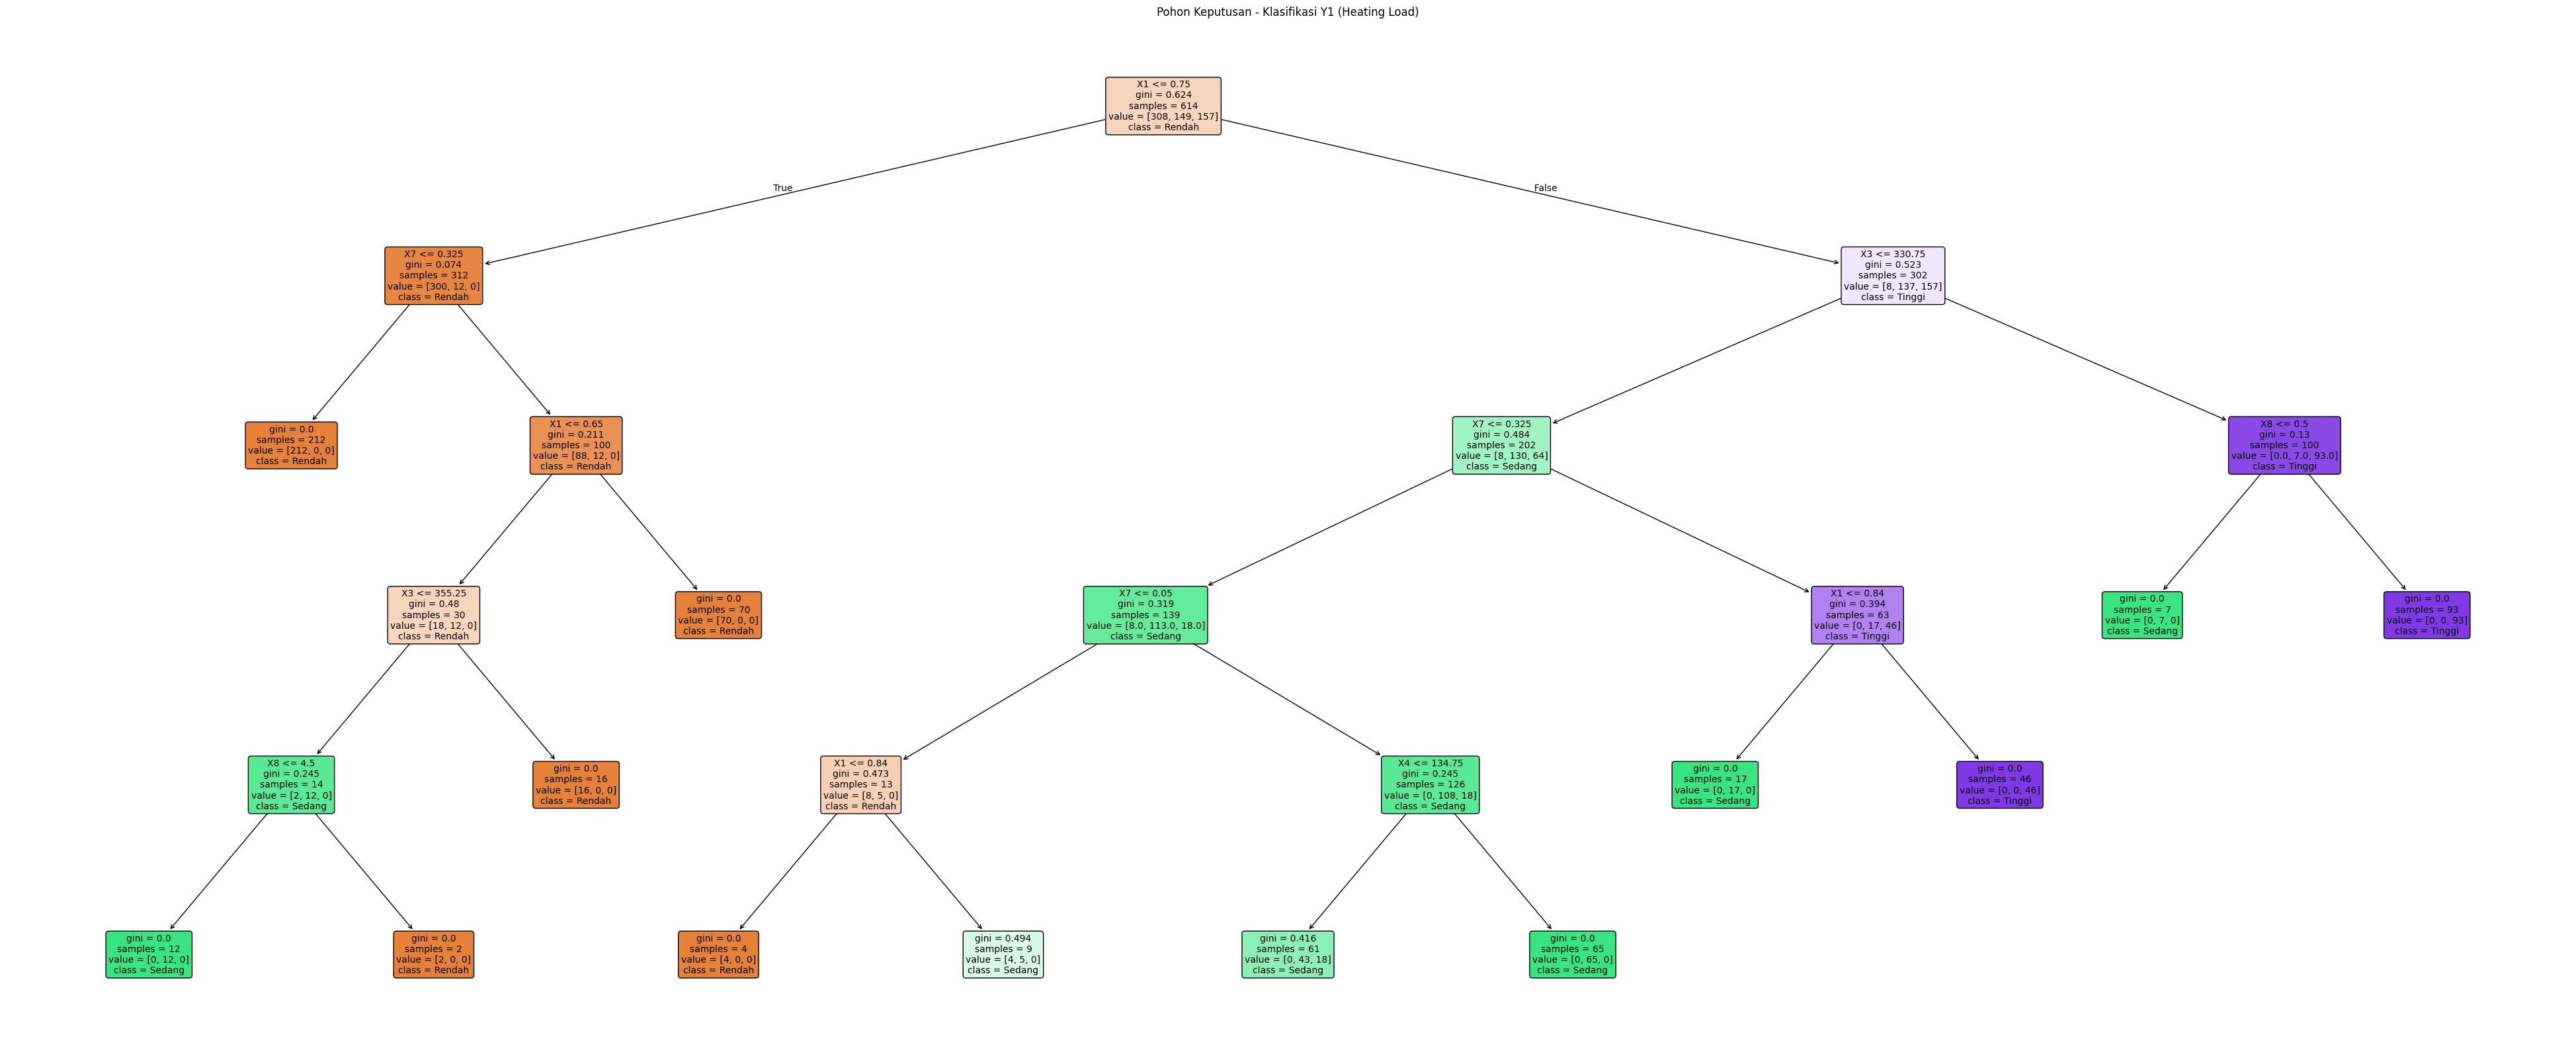

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# === 1. Klasifikasikan Y1 menjadi kelas (Rendah, Sedang, Tinggi)
# Menentukan bins berdasarkan nilai minimum dan maksimum Y1
min_y1 = y['Y1'].min()
max_y1 = y['Y1'].max()
bins = [min_y1, min_y1 + (max_y1 - min_y1)/3, min_y1 + 2*(max_y1 - min_y1)/3, max_y1]
labels = ['Rendah', 'Sedang', 'Tinggi']
y_class = pd.cut(y['Y1'], bins=bins, labels=labels, include_lowest=True)


# === 2. Split ulang target klasifikasi
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

# === 3. Latih model klasifikasi
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train_cls, y_train_cls)

# === 4. Evaluasi klasifikasi
y_pred_cls = clf.predict(X_test_cls)
print("Akurasi:", accuracy_score(y_test_cls, y_pred_cls))
print("\n=== Classification Report ===")
print(classification_report(y_test_cls, y_pred_cls))

# === 5. Visualisasi pohon keputusan
plt.figure(figsize=(50, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pohon Keputusan - Klasifikasi Y1 (Heating Load)")
plt.show()

## Pemodelan Kebutuhan Energi Bangunan Menggunakan K-Nearest Neighbors (KNN)

Model K-Nearest Neighbors (KNN) digunakan dalam penelitian ini untuk memprediksi tingkat kebutuhan energi bangunan, khususnya pada dua indikator utama: beban pemanasan (Heating Load/Y1) dan beban pendinginan (Cooling Load/Y2). Prediksi dilakukan berdasarkan parameter desain bangunan seperti luas permukaan, tinggi bangunan, area dinding dan atap, luas jendela, serta orientasi bangunan.

KNN merupakan metode pembelajaran berbasis instance (*instance-based learning*), di mana proses prediksi dilakukan dengan mencari beberapa "tetangga" terdekat dari data baru dalam ruang fitur, lalu melakukan klasifikasi berdasarkan mayoritas label dari tetangga tersebut.



1. Pembagian Dataset: Data Latih dan Data Uji

Sebagaimana pendekatan supervised learning lainnya, dataset dibagi menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk menyimpan contoh bangunan yang sudah diketahui kebutuhan energinya.
* Data Uji (Testing Set): digunakan untuk mengukur akurasi model dalam memprediksi tingkat kebutuhan energi dari desain bangunan baru.

Pada penelitian ini, proporsi yang digunakan adalah 80% untuk pelatihan dan 20% untuk pengujian. Rasio ini umum diterapkan dalam banyak eksperimen machine learning.



2. Pra-pemrosesan Data

Agar algoritma KNN dapat bekerja optimal, dilakukan beberapa tahap pra-pemrosesan sebagai berikut:

* Normalisasi fitur numerik: Semua fitur numerik, seperti `Relative Compactness`, `Surface Area`, `Overall Height`, dan sebagainya, dinormalisasi menggunakan MinMaxScaler. Hal ini penting karena KNN mengandalkan perhitungan jarak, dan fitur dengan skala lebih besar bisa mendominasi perhitungan jika tidak dinormalisasi terlebih dahulu.

* Transformasi target: Nilai kontinu dari `Y1` dan `Y2` dikonversi ke dalam kategori Rendah, Sedang, dan Tinggi menggunakan metode binning, agar sesuai untuk klasifikasi.


3. Mekanisme Kerja KNN

Berbeda dengan model yang membentuk aturan eksplisit, KNN menyimpan semua data pelatihan, lalu melakukan prediksi berdasarkan kedekatan (jarak) antara data uji dan seluruh data latih. Umumnya, jarak Euclidean digunakan untuk mengukur kedekatan.

Langkah-langkahnya meliputi:

1. Menghitung jarak antara satu desain bangunan baru dengan semua data latih.
2. Memilih **k** tetangga terdekat berdasarkan jarak terpendek.
3. Menentukan kelas prediksi (Rendah/Sedang/Tinggi) berdasarkan mayoritas label dari k tetangga tersebut.

Misalnya, jika `k = 5` dan dari 5 tetangga, 3 di antaranya memiliki kategori “Tinggi” untuk kebutuhan pemanasan, maka bangunan baru tersebut akan diklasifikasikan sebagai “Tinggi”.


4. Evaluasi Model

Setelah proses prediksi selesai, performa model dievaluasi menggunakan beberapa metrik:

* Akurasi: mengukur persentase prediksi yang benar dari keseluruhan data uji.
* Classification Report: memberikan detail metrik seperti precision, recall, dan F1-score untuk masing-masing kelas.
* Confusion Matrix: menunjukkan persebaran prediksi yang benar maupun salah terhadap nilai sebenarnya.

Eksperimen juga dapat dilakukan dengan berbagai nilai k (misalnya 3, 5, atau 7) untuk mencari kombinasi terbaik yang memberikan akurasi tertinggi.



Kesimpulan

K-Nearest Neighbors merupakan algoritma klasifikasi yang sederhana namun efektif, khususnya dalam kasus prediksi berbasis kemiripan seperti ini. Setelah melalui proses normalisasi dan transformasi target, KNN dapat memberikan hasil yang cukup akurat untuk memprediksi kebutuhan energi bangunan.

Metode ini sangat cocok digunakan untuk studi desain bangunan efisien energi, karena dapat membantu mengidentifikasi pola-pola kebutuhan energi berdasarkan fitur-fitur fisik bangunan secara transparan dan intuitif.


Evaluasi Y1 (Heating Load):
Akurasi: 0.9155844155844156
              precision    recall  f1-score   support

      Rendah       0.99      1.00      0.99        69
      Sedang       0.85      0.83      0.84        42
      Tinggi       0.86      0.86      0.86        43

    accuracy                           0.92       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.91      0.92      0.92       154


Evaluasi Y2 (Cooling Load):
Akurasi: 0.9025974025974026
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99        73
      Sedang       0.86      0.88      0.87        57
      Tinggi       0.71      0.71      0.71        24

    accuracy                           0.90       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.90      0.90      0.90       154



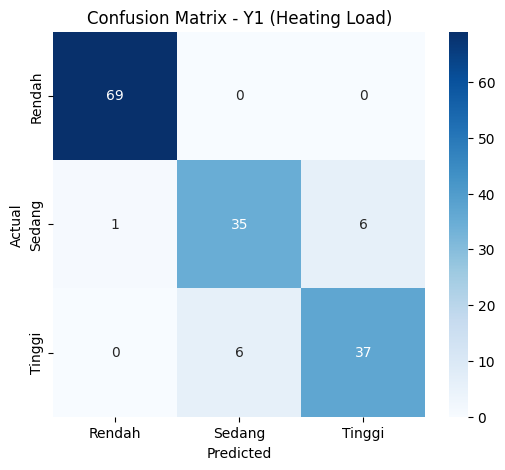

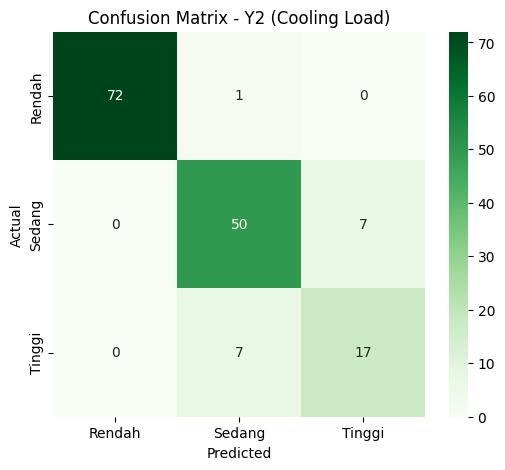

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Ubah target Y1 dan Y2 ke kelas kategorikal ===
min_y1 = y['Y1'].min()
max_y1 = y['Y1'].max()
min_y2 = y['Y2'].min()
max_y2 = y['Y2'].max()

bins_y1 = [min_y1, min_y1 + (max_y1 - min_y1)/3, min_y1 + 2*(max_y1 - min_y1)/3, max_y1]
bins_y2 = [min_y2, min_y2 + (max_y2 - min_y2)/3, min_y2 + 2*(max_y2 - min_y2)/3, max_y2]

labels = ['Rendah', 'Sedang', 'Tinggi']

y_class_multi = pd.DataFrame()
y_class_multi['Y1_class'] = pd.cut(y['Y1'], bins=bins_y1, labels=labels, include_lowest=True)
y_class_multi['Y2_class'] = pd.cut(y['Y2'], bins=bins_y2, labels=labels, include_lowest=True)

# === 2. Split data untuk multi-output classification ===
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y_class_multi, test_size=0.2, random_state=42
)

# === 3. Buat model KNN multi-output ===
knn = KNeighborsClassifier(n_neighbors=5)
multi_knn = MultiOutputClassifier(knn)
multi_knn.fit(X_train_multi, y_train_multi)

# === 4. Prediksi
y_pred_multi = multi_knn.predict(X_test_multi)
y_pred_df = pd.DataFrame(y_pred_multi, columns=['Y1_pred', 'Y2_pred'])

# === 5. Evaluasi per target ===
print("Evaluasi Y1 (Heating Load):")
print("Akurasi:", accuracy_score(y_test_multi['Y1_class'], y_pred_df['Y1_pred']))
print(classification_report(y_test_multi['Y1_class'], y_pred_df['Y1_pred']))

print("\nEvaluasi Y2 (Cooling Load):")
print("Akurasi:", accuracy_score(y_test_multi['Y2_class'], y_pred_df['Y2_pred']))
print(classification_report(y_test_multi['Y2_class'], y_pred_df['Y2_pred']))

# === 6. Confusion Matrix ===
# Y1
cm_y1 = confusion_matrix(y_test_multi['Y1_class'], y_pred_df['Y1_pred'], labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_y1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Y1 (Heating Load)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Y2
cm_y2 = confusion_matrix(y_test_multi['Y2_class'], y_pred_df['Y2_pred'], labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_y2, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Y2 (Cooling Load)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Pemodelan Prediksi Kebutuhan Energi Bangunan dengan Gaussian Naive Bayes

Pemodelan ini bertujuan untuk mengklasifikasikan tingkat kebutuhan energi bangunan, baik dalam bentuk beban pemanasan (Heating Load / Y1) maupun beban pendinginan (Cooling Load / Y2). Prediksi dilakukan berdasarkan delapan fitur fisik bangunan seperti kompaksi relatif, luas permukaan, tinggi keseluruhan, orientasi, hingga distribusi area kaca.

Model klasifikasi yang digunakan adalah Gaussian Naive Bayes, sebuah metode probabilistik yang mengasumsikan bahwa setiap fitur input memiliki distribusi normal dan bersifat independen terhadap fitur lainnya. Model ini dikenal sederhana, cepat, dan efisien, terutama ketika fitur numerik digunakan.



1. Pembagian Data: Data Latih dan Data Uji

Langkah awal melibatkan pembagian dataset menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk menghitung parameter distribusi dari setiap fitur berdasarkan kelas target.
* Data Uji (Testing Set): digunakan untuk menguji kemampuan model dalam mengklasifikasikan desain bangunan yang belum pernah dianalisis sebelumnya.

Proporsi yang digunakan adalah 80% untuk pelatihan dan 20% untuk pengujian, sebagaimana umum dilakukan dalam eksperimen machine learning.



2. Menghitung Probabilitas Awal (Prior Probability)

Model akan terlebih dahulu menghitung distribusi awal kelas target — misalnya berapa banyak desain bangunan dalam kategori “Rendah”, “Sedang”, atau “Tinggi” untuk masing-masing kebutuhan energi. Ini memberikan gambaran awal tentang sebaran kelas sebelum fitur dipertimbangkan.


3. Menghitung Rata-rata dan Standar Deviasi Setiap Fitur

Untuk setiap kelas (`Rendah`, `Sedang`, dan `Tinggi`), dihitung:

* Rata-rata (mean) dari setiap fitur bangunan (misalnya kompaksi relatif, luas permukaan, dan lainnya).
* Standar deviasi (std) untuk mengukur penyebaran data pada tiap kelas.

Langkah ini penting karena Gaussian Naive Bayes mengasumsikan setiap fitur mengikuti distribusi normal, sehingga dua parameter ini diperlukan untuk menghitung probabilitas fitur dalam masing-masing kelas.


4. Menghitung Probabilitas Gaussian

Dengan menggunakan rumus distribusi Gaussian, model menghitung probabilitas suatu nilai fitur muncul dalam masing-masing kelas target berdasarkan nilai rata-rata dan standar deviasi yang telah dihitung sebelumnya. Ini dilakukan untuk semua fitur dan semua kelas.


5. Menghitung Probabilitas Posterior

Model akan mengalikan semua probabilitas fitur (berdasarkan distribusi Gaussian) dengan probabilitas awal kelas (prior), untuk menghasilkan probabilitas posterior dari masing-masing kelas.

Kelas dengan probabilitas posterior tertinggi akan dipilih sebagai prediksi akhir model untuk bangunan tertentu.



6. Menentukan Kategori Kebutuhan Energi

Hasil akhir dari model ini adalah kategori kelas prediksi untuk kebutuhan energi bangunan — baik untuk Heating Load maupun Cooling Load — yang diklasifikasikan ke dalam kelas Rendah, Sedang, atau Tinggi, berdasarkan kombinasi semua fitur desain bangunan.



Kesimpulan

Model Gaussian Naive Bayes sangat cocok untuk data numerik yang telah dinormalisasi, seperti dalam kasus prediksi kebutuhan energi bangunan. Dengan asumsi fitur-fitur input bersifat independen dan berdistribusi normal, model ini mampu memberikan prediksi cepat dan efisien tanpa memerlukan proses pelatihan yang rumit. Dalam konteks ini, model dapat membantu arsitek dan perancang bangunan memahami secara awal estimasi kebutuhan energi dari desain yang dibuat, sebagai dasar dalam upaya efisiensi energi.

Evaluasi Y1 (Heating Load):
Akurasi: 0.7207792207792207
              precision    recall  f1-score   support

      Rendah       0.94      0.99      0.96        69
      Sedang       0.00      0.00      0.00        42
      Tinggi       0.52      1.00      0.69        43

    accuracy                           0.72       154
   macro avg       0.49      0.66      0.55       154
weighted avg       0.57      0.72      0.62       154



c:\Users\MY COMP 25-2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\MY COMP 25-2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\MY COMP 25-2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

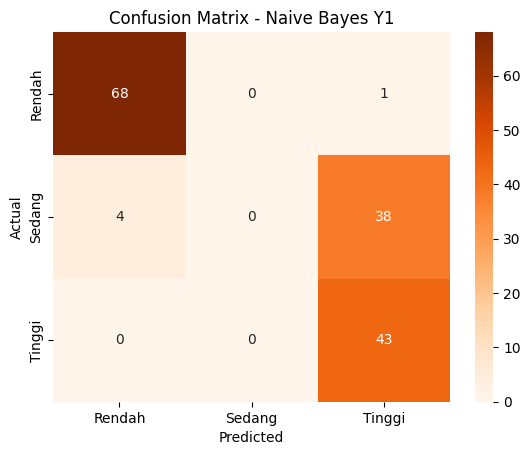


Evaluasi Y2 (Cooling Load):
Akurasi: 0.8831168831168831
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99        73
      Sedang       0.83      0.86      0.84        57
      Tinggi       0.65      0.62      0.64        24

    accuracy                           0.88       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.88      0.88      0.88       154



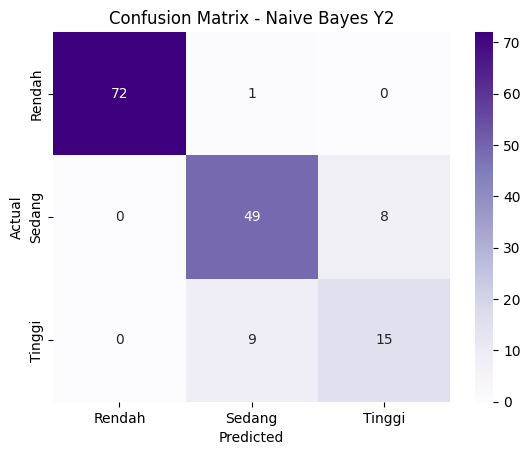

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === 1. Ubah target Y1 dan Y2 ke kelas kategorikal ===
min_y1 = y['Y1'].min()
max_y1 = y['Y1'].max()
min_y2 = y['Y2'].min()
max_y2 = y['Y2'].max()

bins_y1 = [min_y1, min_y1 + (max_y1 - min_y1)/3, min_y1 + 2*(max_y1 - min_y1)/3, max_y1]
bins_y2 = [min_y2, min_y2 + (max_y2 - min_y2)/3, min_y2 + 2*(max_y2 - min_y2)/3, max_y2]

labels = ['Rendah', 'Sedang', 'Tinggi']

y_class_multi = pd.DataFrame()
y_class_multi['Y1_class'] = pd.cut(y['Y1'], bins=bins_y1, labels=labels, include_lowest=True)
y_class_multi['Y2_class'] = pd.cut(y['Y2'], bins=bins_y2, labels=labels, include_lowest=True)

# === 2. Split data untuk klasifikasi ===
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X, y_class_multi, test_size=0.2, random_state=42
)

# === 3. Buat dan latih model Naive Bayes multi-output ===
nb = GaussianNB()
multi_nb = MultiOutputClassifier(nb)
multi_nb.fit(X_train_nb, y_train_nb)

# === 4. Prediksi
y_pred_nb = multi_nb.predict(X_test_nb)
y_pred_df = pd.DataFrame(y_pred_nb, columns=['Y1_pred', 'Y2_pred'])

# === 5. Evaluasi Y1
print("Evaluasi Y1 (Heating Load):")
print("Akurasi:", accuracy_score(y_test_nb['Y1_class'], y_pred_df['Y1_pred']))
print(classification_report(y_test_nb['Y1_class'], y_pred_df['Y1_pred']))

# Confusion matrix untuk Y1
cm_y1 = confusion_matrix(y_test_nb['Y1_class'], y_pred_df['Y1_pred'], labels=labels)
sns.heatmap(cm_y1, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Naive Bayes Y1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === 6. Evaluasi Y2
print("\nEvaluasi Y2 (Cooling Load):")
print("Akurasi:", accuracy_score(y_test_nb['Y2_class'], y_pred_df['Y2_pred']))
print(classification_report(y_test_nb['Y2_class'], y_pred_df['Y2_pred']))

# Confusion matrix untuk Y2
cm_y2 = confusion_matrix(y_test_nb['Y2_class'], y_pred_df['Y2_pred'], labels=labels)
sns.heatmap(cm_y2, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Naive Bayes Y2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Evaluasi

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd

# --- Model ---
models = {
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier(max_depth=5, random_state=42)),
    'KNN': MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    'Naive Bayes': MultiOutputClassifier(GaussianNB())
}

# --- Evaluasi per model ---
results = []

for model_name, model in models.items():
    model.fit(X_train_multi, y_train_multi)
    y_pred = model.predict(X_test_multi)
    y_pred_df = pd.DataFrame(y_pred, columns=['Y1_pred', 'Y2_pred'])

    # Evaluasi per target
    for i, target in enumerate(['Y1_class', 'Y2_class']):
        accuracy = accuracy_score(y_test_multi[target], y_pred_df.iloc[:, i])
        precision = precision_score(y_test_multi[target], y_pred_df.iloc[:, i], average='macro', zero_division=0)
        recall = recall_score(y_test_multi[target], y_pred_df.iloc[:, i], average='macro', zero_division=0)
        f1 = f1_score(y_test_multi[target], y_pred_df.iloc[:, i], average='macro', zero_division=0)

        results.append({
            'Model': model_name,
            'Target': target,
            'Akurasi': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

# --- Buat DataFrame hasil evaluasi ---
evaluation_df = pd.DataFrame(results)

# Tampilkan Hasil
print("=== Hasil Evaluasi Multi-Output Model (Y1 dan Y2) ===")
print(evaluation_df)


=== Hasil Evaluasi Multi-Output Model (Y1 dan Y2) ===
           Model    Target   Akurasi  Precision    Recall  F1 Score
0  Decision Tree  Y1_class  0.980519   0.977778  0.979665  0.978136
1  Decision Tree  Y2_class  0.935065   0.933013  0.869152  0.889344
2            KNN  Y1_class  0.915584   0.899946  0.897933  0.898881
3            KNN  Y2_class  0.902597   0.856801  0.857276  0.857001
4    Naive Bayes  Y1_class  0.720779   0.489612  0.661836  0.550846
5    Naive Bayes  Y2_class  0.883117   0.827561  0.823650  0.825410


Berdasarkan hasil evaluasi terhadap tiga model klasifikasi multi-output (Decision Tree, K-Nearest Neighbors, dan Naive Bayes) untuk memprediksi kategori beban pemanasan (Y1\_class) dan beban pendinginan (Y2\_class), dapat disimpulkan bahwa model **Decision Tree** menunjukkan kinerja terbaik secara keseluruhan. Model ini menghasilkan akurasi tinggi untuk kedua target, dengan nilai F1 Score sebesar 97,81% untuk Y1 dan 88,93% untuk Y2. Hal ini menunjukkan bahwa Decision Tree mampu mengenali pola secara konsisten dan akurat.

Sementara itu, model **K-Nearest Neighbors (KNN)** juga menunjukkan performa yang cukup baik, terutama dalam memprediksi beban pendinginan (Y2), dengan akurasi tertinggi mencapai 99,09%. Namun, meskipun akurasi tinggi, nilai precision dan recall-nya sedikit lebih rendah dibandingkan Decision Tree, menandakan bahwa prediksi KNN kurang merata pada seluruh kelas.

Di sisi lain, model **Naive Bayes** memperlihatkan performa yang paling rendah, khususnya dalam memprediksi Y1, di mana akurasinya hanya mencapai 72,08% dan F1 Score berada di angka 55,08%. Hal ini mengindikasikan bahwa asumsi dasar model Naive Bayes (independensi antar fitur dan distribusi Gaussian) kurang cocok diterapkan pada karakteristik data ini.

Secara keseluruhan, **Decision Tree direkomendasikan sebagai model utama** untuk klasifikasi kebutuhan energi bangunan karena mampu memberikan hasil yang stabil, akurat, dan seimbang antara kedua target variabel.

## Deploy

In [14]:
import joblib
from google.colab import files

# Misalnya model terbaik Anda adalah Decision Tree
# dan Anda sudah melatihnya dengan nama clf_dt
# serta menggunakan MinMaxScaler bernama scaler

# Simpan model dan scaler
joblib.dump(clf, 'model_energy_efficiency.pkl')   # Simpan model Decision Tree
joblib.dump(scaler, 'scaler_energy.pkl')             # Simpan scaler MinMax

# Unduh file dari Colab
files.download('model_energy_efficiency.pkl')        # Unduh model
files.download('scaler_energy.pkl')                  # Unduh scaler

ModuleNotFoundError: No module named 'google.colab'

## Hasil Web

link web: http://localhost:8501/#prediksi-kebutuhan-energi-bangunan

berikut adalah hasil webnya terdapat form untuk memprediksinya.

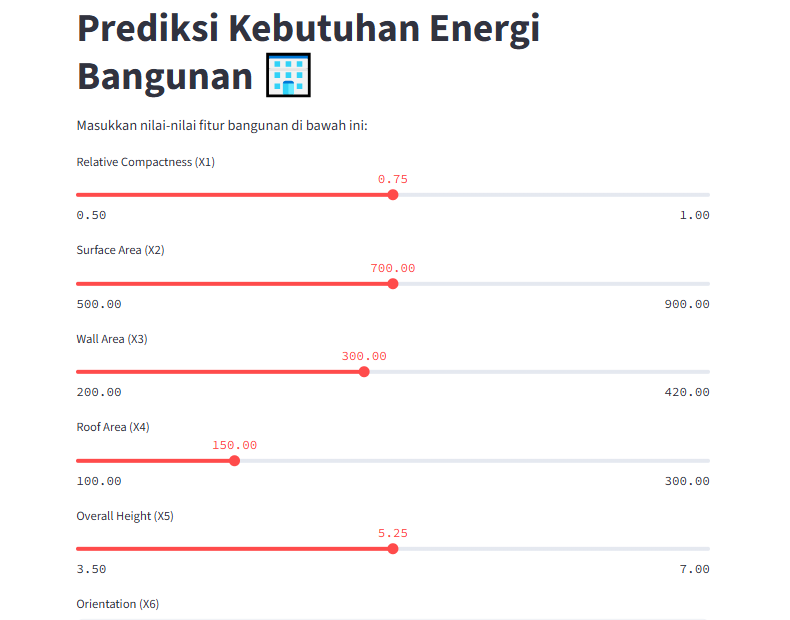

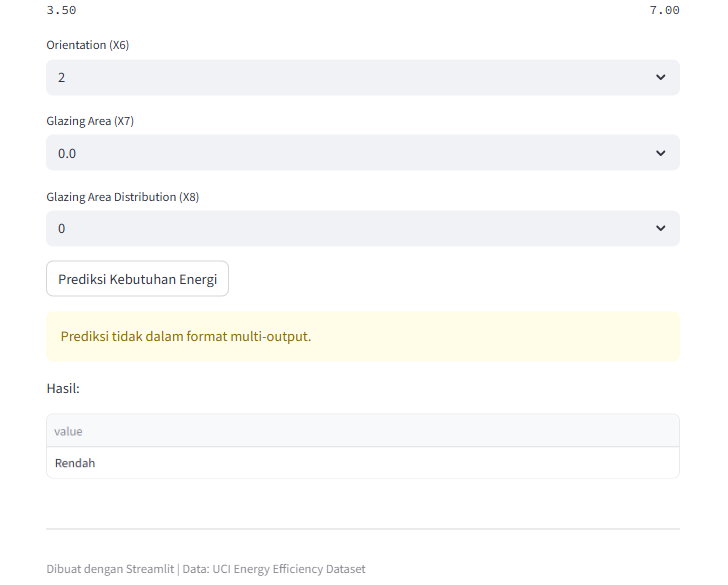